In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict

from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve

In [65]:
df_true = pd.read_csv("LabeledAuthentic-7K.csv")
df_false = pd.read_csv("LabeledFake-1K.csv")

In [66]:
df_true.head(2)

articleID           domain                 date category  \
0          1  bd-pratidin.com  2018-09-20 08:16:43   Sports   
1          2     jugantor.com  2018-09-20 20:20:20   Sports   

                               source relation  \
0  ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° (‡¶è‡¶∏‡¶ø‡¶¨‡¶ø) ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®  Related   
1                            Reporter  Related   

                                    headline  \
0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó   
1                   ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂   

                                             content  label  
0  ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶ö‡¶Æ‡¶ï‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ ‡¶Ü‡¶´‡¶ó‡¶æ‡¶®‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶®‡•§ ‡¶ï‡ßü...    1.0  
1  ‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡¶≤‡ßá‡¶∞ ‡¶¨‡¶ø‡¶™‡¶ï‡ßç‡¶∑‡ßá ...    1.0

In [67]:
df_false.head(2)

articleID             domain                       date       category  \
0          1  channeldhaka.news  2019-03-14T13:34:14+00:00  International   
1          2          earki.com           ‡¶∏‡ßá‡¶Æ‡ßç‡¶¨‡¶∞ ‡ßß‡ß≠, ‡ß®‡ß¶‡ßß‡ßÆ   Miscellaneous   

     source   relation                                 headline  \
0  Reporter  Unrelated                 ‡¶Æ‡ßÅ‡¶∞‡¶ó‡¶ø‡¶∞ ‡¶π‡¶æ‡¶Æ‡¶≤‡¶æ‡ßü ‡¶∂‡ßá‡ßü‡¶æ‡¶≤ ‡¶®‡¶ø‡¶π‡¶§   
1  Reporter  Unrelated  ‡¶¨‡¶ø‡¶ü‡¶ø‡¶≠‡¶ø‡¶§‡ßá ‡¶Ø‡ßá‡¶¨‡¶æ‡¶∞ ‡¶Ü‡¶Æ‡¶ø ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶¶‡¶ø‡¶§‡ßá ‡¶ó‡ßá‡¶≤‡¶æ‡¶Æ   

                                             content  label  F-type  
0  ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡ßü ‡¶è‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡¶¨‡¶æ‡¶¶ ‡¶Ü‡¶õ‡ßá, ‡¶∂‡ßá‡ßü‡¶æ‡¶≤‡ßá‡¶∞ ‡¶ï‡¶æ‡¶õ‡ßá ‡¶Æ‡ßÅ‡¶∞‡¶ó‡ßÄ ‡¶¨‡¶∞‡ßç...      0  Satire  
1  BTV ‡¶•‡ßá‡¶ï‡ßá ‡¶≤‡ßã‡¶ï‡¶ú‡¶® ‡¶Ü‡¶∏‡¶õ‡ßá, ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶®‡¶ø‡¶¨‡ßá‡•§‡¶ö‡¶æ‡¶∞‡¶ú‡¶®‡ßá‡¶∞ ‡¶ü‡¶ø...      0  Satire

In [68]:
df_true.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label'],
      dtype='object')

In [69]:
drop_col=['articleID', 'domain', 'date', 'category', 'source', 'relation']
df_true=df_true.drop(['articleID', 'domain', 'date', 'category', 'source', 'relation'],axis='columns')

In [70]:
df_false.columns

Index(['articleID', 'domain', 'date', 'category', 'source', 'relation',
       'headline', 'content', 'label', 'F-type'],
      dtype='object')

In [71]:
df_false=df_false.drop(['articleID', 'domain', 'date', 'category', 'source', 'relation','F-type'],axis='columns')

In [72]:
df_false

headline  \
0                              ‡¶Æ‡ßÅ‡¶∞‡¶ó‡¶ø‡¶∞ ‡¶π‡¶æ‡¶Æ‡¶≤‡¶æ‡ßü ‡¶∂‡ßá‡ßü‡¶æ‡¶≤ ‡¶®‡¶ø‡¶π‡¶§   
1               ‡¶¨‡¶ø‡¶ü‡¶ø‡¶≠‡¶ø‡¶§‡ßá ‡¶Ø‡ßá‡¶¨‡¶æ‡¶∞ ‡¶Ü‡¶Æ‡¶ø ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶¶‡¶ø‡¶§‡ßá ‡¶ó‡ßá‡¶≤‡¶æ‡¶Æ   
2     ‡¶¨‡¶ø‡¶¶‡ßá‡¶∂ ‡¶•‡ßá‡¶ï‡ßá ‡¶â‡¶®‡ßç‡¶®‡¶§‡¶Æ‡¶æ‡¶®‡ßá‡¶∞ ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ‡¶¶‡¶≤ ‡¶Ü‡¶Æ‡¶¶‡¶æ‡¶®‡¶ø ‡¶ï‡¶∞‡¶æ‡¶∞ ‡¶™‡¶∞‡¶æ...   
3                         ‡¶Ö‡¶¨‡¶∏‡¶∞ ‡¶®‡ßá‡ßü‡¶æ‡¶∞ ‡¶ò‡ßã‡¶∑‡¶£‡¶æ ‡¶¶‡¶ø‡¶≤‡ßá‡¶® ‡¶Æ‡ßá‡¶∏‡¶ø !   
4     ‡¶Æ‡¶æ‡¶¶‡¶æ‡¶∞‡¶´‡¶æ‡¶ï‡¶æ‡¶∞ ‡¶®‡¶π‡ßá, ‡¶¨‡ßç‡¶∞‡¶æ‡¶¶‡¶æ‡¶∞‡¶´‡¶æ‡¶ï‡¶æ‡¶∞: ‡¶∏‡¶æ‡¶ï‡¶æ | ‡¶¶‡ßà‡¶®‡¶ø‡¶ï ‡¶Æ‡¶§‡¶ø...   
...                                                 ...   
1294  ‡¶∞‡¶æ‡¶ú‡¶∂‡¶æ‡¶π‡ßÄ‡¶§‡ßá ‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶Å‡¶ö‡¶ø‡¶∞ ‡¶Ü‡¶ì‡ßü‡¶æ‡¶ú‡ßá ‡¶ò‡ßÅ‡¶Æ‡ßá‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶á ‡¶∏...   
1295  IAS ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶è ‡¶Æ‡ßá‡ßü‡ßá‡¶ü‡¶ø‡¶ï‡ßá ‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡¶∏‡¶æ ‡¶ï‡¶∞‡¶æ ‡¶π‡¶≤ ‡¶Æ‡ßá‡ßü‡ßá‡¶¶‡ßá...   
1296         ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶¨‡¶ø‡¶∏‡ßç‡¶´‡ßã‡¶∞‡¶£‡ßá ‡¶ï‡¶≤‡ßá‡¶ú‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶Æ‡ßÉ‡¶§‡ßç‡¶Ø‡ßÅ!   
1297  ‡¶´‡ßá‡¶∏‡¶¨‡ßÅ‡¶ï‡ßá ‡¶Ø‡ßá‡¶≠‡¶æ‡¶¨‡ßá ‡¶®‡¶§‡ßÅ‡¶® ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶®‡¶®‡ßç‡¶¶‡¶® ‡¶¨‡¶æ‡¶∞‡ßç‡¶§‡¶æ...   
1298            ‡¶Æ‡¶æ‡¶ù ‡¶Ü‡¶ï‡¶æ‡¶∂‡ßá ‡¶™‡¶∞‡ßç‡¶® ‡¶¶‡ßá‡¶ñ‡¶æ‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶™‡¶æ‡¶á‡¶≤‡¶ü ‡¶Ü‡¶ü‡¶ï!   

                                                content  label  
0     ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡ßü ‡¶è‡¶ï‡¶ü‡¶æ ‡¶™‡ßç‡¶∞‡¶¨‡¶æ‡¶¶ ‡¶Ü‡¶õ‡ßá, ‡¶∂‡ßá‡ßü‡¶æ‡¶≤‡ßá‡¶∞ ‡¶ï‡¶æ‡¶õ‡ßá ‡¶Æ‡ßÅ‡¶∞‡¶ó‡ßÄ ‡¶¨‡¶∞‡ßç...      0  
1     BTV ‡¶•‡ßá‡¶ï‡ßá ‡¶≤‡ßã‡¶ï‡¶ú‡¶® ‡¶Ü‡¶∏‡¶õ‡ßá, ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶®‡¶ø‡¶¨‡ßá‡•§‡¶ö‡¶æ‡¶∞‡¶ú‡¶®‡ßá‡¶∞ ‡¶ü‡¶ø...      0  
2     ‡¶Ö‡¶¶‡ßç‡¶≠‡ßÅ‡¶§ ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ‡¶¶‡¶≤‡¶π‡ßÄ‡¶®‡¶§‡¶æ‡ßü ‡¶≠‡ßÅ‡¶ó‡¶õ‡ßá ‡¶∏‡¶∞‡¶ï‡¶æ‡¶∞‡•§ ‡¶è ‡¶è‡¶ï ‡¶Ö‡¶®‡ßç‡¶Ø‡¶∞‡¶ï...      0  
3     ‡¶∞‡¶æ‡¶∂‡¶ø‡ßü‡¶æ ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶ï‡¶æ‡¶™ ‡¶®‡¶ï‡¶Ü‡¶â‡¶ü ‡¶™‡¶∞‡ßç‡¶¨‡ßá ‡¶´‡ßç‡¶∞‡¶æ‡¶®‡ßç‡¶∏‡ßá‡¶∞ ‡¶∏‡¶æ‡¶•‡ßá ‡ß™-‡ß©...      0  
4     ‡¶®‡¶ø‡¶ú‡¶∏‡ßç‡¶¨ ‡¶Æ‡¶§‡¶ø‡¶¨‡ßá‡¶¶‡¶ï‚Äò‡¶Æ‡¶æ‡¶¶‡¶æ‡¶∞‡¶´‡¶æ‡¶ï‡¶æ‡¶∞ ‡¶®‡¶π‡ßá, ‡¶Ü‡¶Æ‡¶ø ‡¶¨‡ßç‡¶∞‡¶æ‡¶¶‡¶æ‡¶∞‡¶´‡¶æ‡¶ï‡¶æ...      0  
...                                                 ...    ...  
1294  ‡¶∞‡¶æ‡¶ú‡¶∂‡¶æ‡¶π‡ßÄ‡¶∞ ‡¶∏‡¶æ‡¶π‡ßá‡¶¨ ‡¶¨‡¶æ‡¶ú‡¶æ‡¶∞ ‡¶Æ‡ßã‡ßú‡ßá ‡¶∞‡¶æ‡¶§‡ßá ‡¶ò‡ßÅ‡¶Æ‡ßá‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶π‡¶æ‡¶∏...      0  
1295  IAS ‡¶™‡¶∞‡ßÄ‡¶ï‡ßç‡¶∑‡¶æ‡ßü ‡¶è‡¶Æ‡¶® ‡¶è‡¶Æ‡¶® ‡¶Ö‡¶¨‡¶æ‡¶ï ‡¶ï‡¶∞‡ßá ‡¶¶‡ßá‡¶ì‡ßü‡¶æ ‡¶™‡ßç‡¶∞‡¶∂‡ßç‡¶® ‡¶è‡¶∏‡ßá...      0  
1296  ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶´‡ßã‡¶® ‡¶¨‡¶ø‡¶∏‡ßç‡¶´‡ßã‡¶∞‡¶£ ‡¶π‡¶Ø‡¶º‡ßá ‡¶∏‡ßç‡¶¨‡¶™‡ßç‡¶®‡ßÄ‡¶≤ ‡¶Æ‡¶ú‡ßÅ‡¶Æ‡¶¶‡¶æ...      0  
1297  ‡¶Ü‡¶™‡¶®‡¶æ‡¶ï‡ßá ‡¶®‡¶§‡ßÅ‡¶® ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡¶ø‡¶∏‡¶≠‡¶æ‡¶∞ ‡¶∏‡¶¶‡¶∏‡ßç‡¶Ø‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶®‡¶®‡ßç‡¶¶‡¶® ‡¶ú‡¶æ‡¶®‡¶æ...      0  
1298  ‡¶¨‡¶ø‡¶Æ‡¶æ‡¶® ‡¶Ø‡¶ñ‡¶® ‡¶Ü‡¶ï‡¶æ‡¶∂‡ßá ‡¶§‡¶ñ‡¶® ‡¶Ü‡¶∞ ‡¶ï‡ßã‡¶®‡¶ì ‡¶¶‡¶ø‡¶ï‡ßá ‡¶ñ‡ßá‡¶Ø‡¶º‡¶æ‡¶≤ ‡¶®‡¶æ ‡¶∞‡ßá‡¶ñ...      0  

[1299 rows x 3 columns]

# Distribution of Fake News and Real News

Text(0, 0.5, 'Proportion of News Articles')

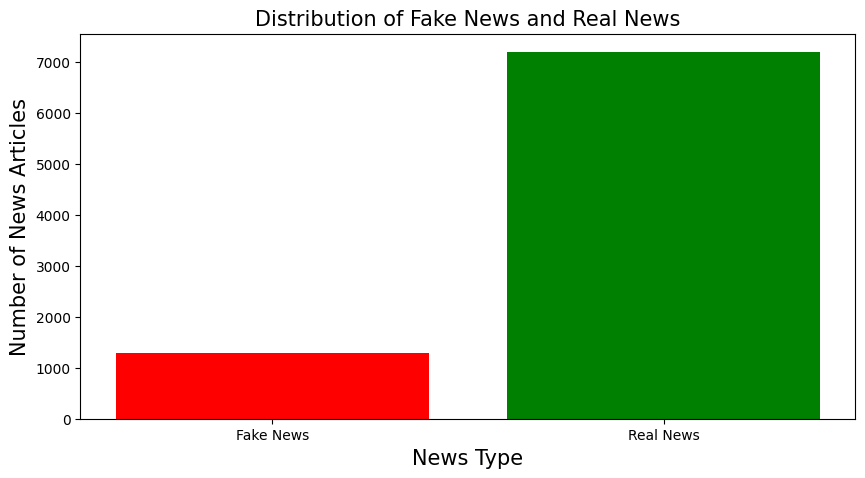

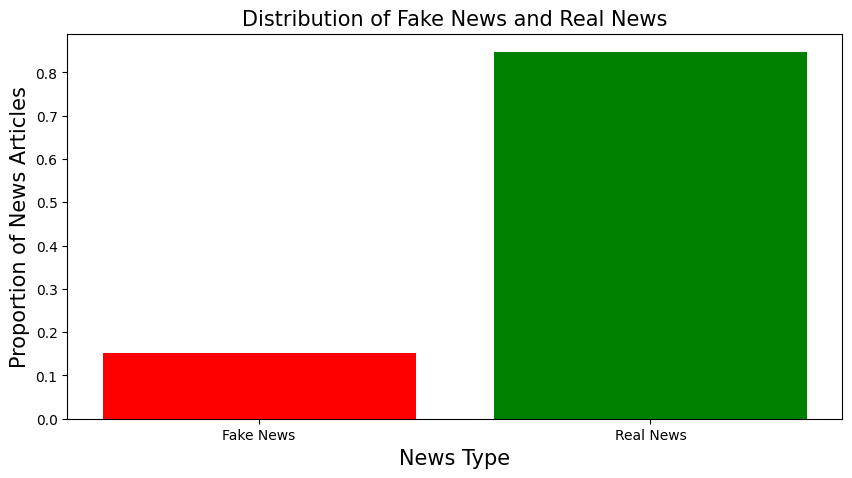

In [73]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_false), color='red')
plt.bar('Real News', len(df_true), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Number of News Articles', size=15)


total_len = len(df_false) + len(df_true)
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df_false) / total_len, color='red')
plt.bar('Real News', len(df_true) / total_len, color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Proportion of News Articles', size=15)

In [74]:
ban_df=pd.concat([df_true,df_false],axis=0)

In [75]:
ban_df.head(3)

headline  \
0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó   
1                   ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂   
2             ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡ß™‡ß©   

                                             content  label  
0  ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶ö‡¶Æ‡¶ï‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ ‡¶Ü‡¶´‡¶ó‡¶æ‡¶®‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶®‡•§ ‡¶ï‡ßü...    1.0  
1  ‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡¶≤‡ßá‡¶∞ ‡¶¨‡¶ø‡¶™‡¶ï‡ßç‡¶∑‡ßá ...    1.0  
2  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶® ‡¶™‡¶∞‡¶ø‡¶ö‡¶æ‡¶≤‡¶®‡¶æ ‡¶ï‡¶∞...    1.0

In [76]:
ban_df.shape

(8501, 3)

In [77]:
ban_df.isnull().sum()

headline    0
content     0
label       0
dtype: int64

In [78]:
ban_df.duplicated().sum()

0

In [79]:
ban_df['Content'] = ban_df['headline'] + ban_df['content']

In [80]:
ban_df.head()

headline  \
0          ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó   
1                           ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂   
2                     ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡ß™‡ß©   
3  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß...   
4     '‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡ß≠ ‡¶¶‡¶ø‡¶®‡ßá, ‡¶è‡¶ñ‡¶® ‡¶§‡¶æ ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§'   

                                             content  label  \
0  ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶ö‡¶Æ‡¶ï‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ ‡¶Ü‡¶´‡¶ó‡¶æ‡¶®‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶®‡•§ ‡¶ï‡ßü...    1.0   
1  ‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡¶≤‡ßá‡¶∞ ‡¶¨‡¶ø‡¶™‡¶ï‡ßç‡¶∑‡ßá ...    1.0   
2  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶® ‡¶™‡¶∞‡¶ø‡¶ö‡¶æ‡¶≤‡¶®‡¶æ ‡¶ï‡¶∞...    1.0   
3  ‡¶∏‡¶®‡¶æ‡¶§‡¶® ‡¶ß‡¶∞‡ßç‡¶Æ‡¶æ‡¶¨‡¶≤‡¶Æ‡ßç‡¶¨‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶∏‡¶¨‡¶ö‡ßá‡ßü‡ßá ‡¶¨‡ßú ‡¶ß‡¶∞‡ßç‡¶Æ‡ßÄ‡ßü ‡¶â‡ßé‡¶∏‡¶¨ ‡¶¶‡ßÅ‡¶∞...    1.0   
4  ‡¶≠‡¶æ‡¶∞‡¶§ ‡¶•‡ßá‡¶ï‡ßá ‡¶™‡¶æ‡¶á‡¶™ ‡¶≤‡¶æ‡¶á‡¶®‡ßá‡¶∞ ‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡ßá ‡¶∏‡¶∞‡¶æ‡¶∏‡¶∞‡¶ø ‡¶¶‡ßá‡¶∂‡ßá ‡¶ú‡ßç‡¶¨‡¶æ...    1.0   

                                             Content  
0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...  
1  ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...  
2  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡ß™‡ß©‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨...  
3  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß...  
4  '‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡ß≠ ‡¶¶‡¶ø‡¶®‡ßá, ‡¶è‡¶ñ‡¶® ‡¶§‡¶æ ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§'...

In [81]:
ban_df1=ban_df.drop(['headline','content'],axis='columns')

In [82]:
ban_df.head()

headline  \
0          ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó   
1                           ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂   
2                     ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡ß™‡ß©   
3  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß...   
4     '‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡ß≠ ‡¶¶‡¶ø‡¶®‡ßá, ‡¶è‡¶ñ‡¶® ‡¶§‡¶æ ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§'   

                                             content  label  \
0  ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡ßá‡¶∞ ‡¶®‡¶§‡ßÅ‡¶® ‡¶ö‡¶Æ‡¶ï‡ßá‡¶∞ ‡¶®‡¶æ‡¶Æ ‡¶Ü‡¶´‡¶ó‡¶æ‡¶®‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶®‡•§ ‡¶ï‡ßü...    1.0   
1  ‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¶‡¶≤‡ßá‡¶∞ ‡¶¨‡¶ø‡¶™‡¶ï‡ßç‡¶∑‡ßá ...    1.0   
2  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶® ‡¶™‡¶∞‡¶ø‡¶ö‡¶æ‡¶≤‡¶®‡¶æ ‡¶ï‡¶∞...    1.0   
3  ‡¶∏‡¶®‡¶æ‡¶§‡¶® ‡¶ß‡¶∞‡ßç‡¶Æ‡¶æ‡¶¨‡¶≤‡¶Æ‡ßç‡¶¨‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶∏‡¶¨‡¶ö‡ßá‡ßü‡ßá ‡¶¨‡ßú ‡¶ß‡¶∞‡ßç‡¶Æ‡ßÄ‡ßü ‡¶â‡ßé‡¶∏‡¶¨ ‡¶¶‡ßÅ‡¶∞...    1.0   
4  ‡¶≠‡¶æ‡¶∞‡¶§ ‡¶•‡ßá‡¶ï‡ßá ‡¶™‡¶æ‡¶á‡¶™ ‡¶≤‡¶æ‡¶á‡¶®‡ßá‡¶∞ ‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡ßá ‡¶∏‡¶∞‡¶æ‡¶∏‡¶∞‡¶ø ‡¶¶‡ßá‡¶∂‡ßá ‡¶ú‡ßç‡¶¨‡¶æ...    1.0   

                                             Content  
0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...  
1  ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...  
2  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡ß™‡ß©‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨...  
3  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß...  
4  '‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡ß≠ ‡¶¶‡¶ø‡¶®‡ßá, ‡¶è‡¶ñ‡¶® ‡¶§‡¶æ ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§'...

In [83]:
ban_df1.head()

label                                            Content
0    1.0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...
1    1.0  ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...
2    1.0  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡ß™‡ß©‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨...
3    1.0  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß...
4    1.0  '‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡ß≠ ‡¶¶‡¶ø‡¶®‡ßá, ‡¶è‡¶ñ‡¶® ‡¶§‡¶æ ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§'...

In [84]:
ban_df2=ban_df.drop(['headline','content'],axis='columns')

# Creating a function to convert the text in lowercase, remove the extra space, special characeters, url and links

In [85]:
def wordopt(Content):
    Content = Content.lower()
    Content = re.sub('\[.*?\]','',Content)
    # Content = re.sub("\\W", " ", Content)
    Content = re.sub('https?://\S+|wwww\.\S+','',Content)
    Content = re.sub('<.*?>+', '' ,Content)
    Content = re.sub('[%s]' % re.escape(string.punctuation), '', Content)
    Content = re.sub('\n','',Content)
    Content = re.sub('\w*\d\w*','',Content)
    return Content


In [86]:
ban_df1['Content']=ban_df1['Content'].apply(wordopt)

In [87]:
ban_df1

label                                            Content
0       1.0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...
1       1.0  ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...
2       1.0  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã...
3       1.0  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß...
4       1.0  ‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§  ‡¶¶‡¶ø‡¶®‡ßá ‡¶è‡¶ñ‡¶® ‡¶§‡¶æ ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§‡¶≠‡¶æ‡¶∞‡¶§...
...     ...                                                ...
1294    0.0  ‡¶∞‡¶æ‡¶ú‡¶∂‡¶æ‡¶π‡ßÄ‡¶§‡ßá ‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶Å‡¶ö‡¶ø‡¶∞ ‡¶Ü‡¶ì‡ßü‡¶æ‡¶ú‡ßá ‡¶ò‡ßÅ‡¶Æ‡ßá‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶á ‡¶∏...
1295    0.0  ias ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶è ‡¶Æ‡ßá‡ßü‡ßá‡¶ü‡¶ø‡¶ï‡ßá ‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡¶∏‡¶æ ‡¶ï‡¶∞‡¶æ ‡¶π‡¶≤ ‡¶Æ‡ßá‡ßü‡ßá‡¶¶‡ßá...
1296    0.0  ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶¨‡¶ø‡¶∏‡ßç‡¶´‡ßã‡¶∞‡¶£‡ßá ‡¶ï‡¶≤‡ßá‡¶ú‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶Æ‡ßÉ‡¶§‡ßç‡¶Ø‡ßÅ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø...
1297    0.0  ‡¶´‡ßá‡¶∏‡¶¨‡ßÅ‡¶ï‡ßá ‡¶Ø‡ßá‡¶≠‡¶æ‡¶¨‡ßá ‡¶®‡¶§‡ßÅ‡¶® ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶®‡¶®‡ßç‡¶¶‡¶® ‡¶¨‡¶æ‡¶∞‡ßç‡¶§‡¶æ...
1298    0.0  ‡¶Æ‡¶æ‡¶ù ‡¶Ü‡¶ï‡¶æ‡¶∂‡ßá ‡¶™‡¶∞‡ßç‡¶® ‡¶¶‡ßá‡¶ñ‡¶æ‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶™‡¶æ‡¶á‡¶≤‡¶ü ‡¶Ü‡¶ü‡¶ï‡¶¨‡¶ø‡¶Æ‡¶æ‡¶® ‡¶Ø‡¶ñ...

[8501 rows x 2 columns]

## Tokenize

In [88]:
def tokenize_bangla(text):
    # Define characters to be treated as separators (you can add more if needed)
    separators = [' ', ',', '.', '!', '?', '...', '‚Äî', '(', ')', '[', ']', '{', '}', ':', ';']

    # Initialize variables
    current_word = ""
    tokens = []

    # Iterate through each character in the text
    for char in text:
        # If the character is a separator, add the current word to the tokens list
        if char in separators:
            if current_word:
                tokens.append(current_word)
                current_word = ""
        else:
            # Build the current word character by character
            current_word += char

    # Add the last word if not added yet
    if current_word:
        tokens.append(current_word)

    return tokens

In [89]:
 ban_df1['Content']=ban_df1['Content'].apply(tokenize_bangla)

# Stop Word remove

In [90]:
def remove_stopwords_bangla(text):
    stopwords_list = ["‡¶Ö‡¶§‡¶è‡¶¨", "‡¶Ö‡¶•‡¶ö", "‡¶Ö‡¶•‡¶¨‡¶æ", "‡¶Ö‡¶®‡ßÅ‡¶Ø‡¶æ‡¶Ø‡¶º‡ßÄ", "‡¶Ö‡¶®‡ßá‡¶ï", "‡¶Ö‡¶®‡ßá‡¶ï‡ßá",
                      "‡¶Ö‡¶®‡ßá‡¶ï‡ßá‡¶á", "‡¶Ö‡¶®‡ßç‡¶§‡¶§", "‡¶Ö‡¶®‡ßç‡¶Ø", "‡¶Ö‡¶¨‡¶ß‡¶ø", "‡¶Ö‡¶¨‡¶∂‡ßç‡¶Ø", "‡¶Ö‡¶∞‡ßç‡¶•‡¶æ‡¶§", "‡¶Ü‡¶á",
                      "‡¶Ü‡¶ó‡¶æ‡¶Æ‡ßÄ", "‡¶Ü‡¶ó‡ßá", "‡¶Ü‡¶ó‡ßá‡¶á", "‡¶Ü‡¶õ‡ßá", "‡¶Ü‡¶ú", "‡¶Ü‡¶¶‡ßç‡¶Ø‡¶≠‡¶æ‡¶ó‡ßá", "‡¶Ü‡¶™‡¶®‡¶æ‡¶∞",
                      "‡¶Ü‡¶™‡¶®‡¶ø", "‡¶Ü‡¶¨‡¶æ‡¶∞", "‡¶Ü‡¶Æ‡¶∞‡¶æ", "‡¶Ü‡¶Æ‡¶æ‡¶ï‡ßá", "‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞", "‡¶Ü‡¶Æ‡¶æ‡¶∞", "‡¶Ü‡¶Æ‡¶ø", "‡¶Ü‡¶∞",
                      "‡¶Ü‡¶∞‡¶ì", "‡¶á", "‡¶á‡¶§‡ßç‡¶Ø‡¶æ‡¶¶‡¶ø", "‡¶á‡¶π‡¶æ", "‡¶â‡¶ö‡¶ø‡¶§", "‡¶â‡¶§‡ßç‡¶§‡¶∞", "‡¶â‡¶®‡¶ø", "‡¶â‡¶™‡¶∞", "‡¶â‡¶™‡¶∞‡ßá", "‡¶è",
                      "‡¶è‡¶Å‡¶¶‡ßá‡¶∞", "‡¶è‡¶Å‡¶∞‡¶æ", "‡¶è‡¶á", "‡¶è‡¶ï‡¶á", "‡¶è‡¶ï‡¶ü‡¶ø", "‡¶è‡¶ï‡¶¨‡¶æ‡¶∞", "‡¶è‡¶ï‡ßá", "‡¶è‡¶ï‡ßç", "‡¶è‡¶ñ‡¶®", "‡¶è‡¶ñ‡¶®‡¶ì",
                      "‡¶è‡¶ñ‡¶æ‡¶®‡ßá", "‡¶è‡¶ñ‡¶æ‡¶®‡ßá‡¶á", "‡¶è‡¶ü‡¶æ", "‡¶è‡¶ü‡¶æ‡¶á", "‡¶è‡¶ü‡¶ø", "‡¶è‡¶§", "‡¶è‡¶§‡¶ü‡¶æ‡¶á", "‡¶è‡¶§‡ßá", "‡¶è‡¶¶‡ßá‡¶∞", "‡¶è‡¶¨",
                      "‡¶è‡¶¨‡¶Ç", "‡¶è‡¶¨‡¶æ‡¶∞", "‡¶è‡¶Æ‡¶®", "‡¶è‡¶Æ‡¶®‡¶ï‡ßÄ", "‡¶è‡¶Æ‡¶®‡¶ø", "‡¶è‡¶∞", "‡¶è‡¶∞‡¶æ", "‡¶è‡¶≤", "‡¶è‡¶∏", "‡¶è‡¶∏‡ßá", "‡¶ê",
                      "‡¶ì", "‡¶ì‡¶Å‡¶¶‡ßá‡¶∞", "‡¶ì‡¶Å‡¶∞", "‡¶ì‡¶Å‡¶∞‡¶æ", "‡¶ì‡¶á", "‡¶ì‡¶ï‡ßá", "‡¶ì‡¶ñ‡¶æ‡¶®‡ßá", "‡¶ì‡¶¶‡ßá‡¶∞", "‡¶ì‡¶∞", "‡¶ì‡¶∞‡¶æ", "‡¶ï‡¶ñ‡¶®‡¶ì", "‡¶ï‡¶§", "‡¶ï‡¶¨‡ßá",
                      "‡¶ï‡¶Æ‡¶®‡ßá", "‡¶ï‡¶Ø‡¶º‡ßá‡¶ï", "‡¶ï‡¶Ø‡¶º‡ßá‡¶ï‡¶ü‡¶ø", "‡¶ï‡¶∞‡¶õ‡ßá", "‡¶ï‡¶∞‡¶õ‡ßá‡¶®", "‡¶ï‡¶∞‡¶§‡ßá", "‡¶ï‡¶∞‡¶¨‡ßá", "‡¶ï‡¶∞‡¶¨‡ßá‡¶®", "‡¶ï‡¶∞‡¶≤‡ßá", "‡¶ï‡¶∞‡¶≤‡ßá‡¶®", "‡¶ï‡¶∞‡¶æ", "‡¶ï‡¶∞‡¶æ‡¶á",
                      "‡¶ï‡¶∞‡¶æ‡¶Ø‡¶º", "‡¶ï‡¶∞‡¶æ‡¶∞", "‡¶ï‡¶∞‡¶ø", "‡¶ï‡¶∞‡¶ø‡¶§‡ßá", "‡¶ï‡¶∞‡¶ø‡¶Ø‡¶º‡¶æ", "‡¶ï‡¶∞‡¶ø‡¶Ø‡¶º‡ßá", "‡¶ï‡¶∞‡ßá", "‡¶ï‡¶∞‡ßá‡¶á", "‡¶ï‡¶∞‡ßá‡¶õ‡¶ø‡¶≤‡ßá‡¶®", "‡¶ï‡¶∞‡ßá‡¶õ‡ßá", "‡¶ï‡¶∞‡ßá‡¶õ‡ßá‡¶®", "‡¶ï‡¶∞‡ßá‡¶®", "‡¶ï‡¶æ‡¶â‡¶ï‡ßá",
                      "‡¶ï‡¶æ‡¶õ", "‡¶ï‡¶æ‡¶õ‡ßá", "‡¶ï‡¶æ‡¶ú", "‡¶ï‡¶æ‡¶ú‡ßá", "‡¶ï‡¶æ‡¶∞‡¶ì", "‡¶ï‡¶æ‡¶∞‡¶£", "‡¶ï‡¶ø", "‡¶ï‡¶ø‡¶Ç‡¶¨‡¶æ", "‡¶ï‡¶ø‡¶õ‡ßÅ", "‡¶ï‡¶ø‡¶õ‡ßÅ‡¶á", "‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ", "‡¶ï‡ßÄ", "‡¶ï‡ßá", "‡¶ï‡ßá‡¶â", "‡¶ï‡ßá‡¶â‡¶á", "‡¶ï‡ßá‡¶ñ‡¶æ", "‡¶ï‡ßá‡¶®", "‡¶ï‡ßã‡¶ü‡¶ø", "‡¶ï‡ßã‡¶®", "‡¶ï‡ßã‡¶®‡¶ì", "‡¶ï‡ßã‡¶®‡ßã",
                      "‡¶ï‡ßç‡¶∑‡ßá‡¶§‡ßç‡¶∞‡ßá", "‡¶ï‡¶Ø‡¶º‡ßá‡¶ï", "‡¶ñ‡ßÅ‡¶¨", "‡¶ó‡¶ø‡¶Ø‡¶º‡ßá", "‡¶ó‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡ßá", "‡¶ó‡¶ø‡¶Ø‡¶º‡ßá", "‡¶ó‡ßÅ‡¶≤‡¶ø", "‡¶ó‡ßá‡¶õ‡ßá", "‡¶ó‡ßá‡¶≤", "‡¶ó‡ßá‡¶≤‡ßá", "‡¶ó‡ßã‡¶ü‡¶æ", "‡¶ö‡¶≤‡ßá", "‡¶ö‡¶æ‡¶®", "‡¶ö‡¶æ‡¶Ø‡¶º", "‡¶ö‡¶æ‡¶∞", "‡¶ö‡¶æ‡¶≤‡ßÅ", "‡¶ö‡ßá‡¶Ø‡¶º‡ßá", "‡¶ö‡ßá‡¶∑‡ßç‡¶ü‡¶æ", "‡¶õ‡¶æ‡¶°‡¶º‡¶æ", "‡¶õ‡¶æ‡¶°‡¶º‡¶æ‡¶ì", "‡¶õ‡¶ø‡¶≤", "‡¶õ‡¶ø‡¶≤‡ßá‡¶®", "‡¶ú‡¶®", "‡¶ú‡¶®‡¶ï‡ßá", "‡¶ú‡¶®‡ßá‡¶∞", "‡¶ú‡¶®‡ßç‡¶Ø", "‡¶ú‡¶®‡ßç‡¶Ø‡¶ì‡¶ú‡ßá", "‡¶ú‡¶æ‡¶®‡¶§‡ßá", "‡¶ú‡¶æ‡¶®‡¶æ", "‡¶ú‡¶æ‡¶®‡¶æ‡¶®‡ßã", "‡¶ú‡¶æ‡¶®‡¶æ‡¶Ø‡¶º", "‡¶ú‡¶æ‡¶®‡¶ø‡¶Ø‡¶º‡ßá", "‡¶ú‡¶æ‡¶®‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡ßá", "‡¶ú‡ßá", "‡¶ú‡ßç‡¶®‡¶ú‡¶®", "‡¶ü‡¶ø", "‡¶†‡¶ø‡¶ï", "‡¶§‡¶ñ‡¶®", "‡¶§‡¶§",
                      "‡¶§‡¶•‡¶æ", "‡¶§‡¶¨‡ßÅ", "‡¶§‡¶¨‡ßá", "‡¶§‡¶æ", "‡¶§‡¶æ‡¶Å‡¶ï‡ßá", "‡¶§‡¶æ‡¶Å‡¶¶‡ßá‡¶∞", "‡¶§‡¶æ‡¶Å‡¶∞", "‡¶§‡¶æ‡¶Å‡¶∞‡¶æ", "‡¶§‡¶æ‡¶Å‡¶æ‡¶π‡¶æ‡¶∞‡¶æ", "‡¶§‡¶æ‡¶á", "‡¶§‡¶æ‡¶ì", "‡¶§‡¶æ‡¶ï‡ßá", "‡¶§‡¶æ‡¶§‡ßá", "‡¶§‡¶æ‡¶¶‡ßá‡¶∞", "‡¶§‡¶æ‡¶∞", "‡¶§‡¶æ‡¶∞‡¶™‡¶∞", "‡¶§‡¶æ‡¶∞‡¶æ", "‡¶§‡¶æ‡¶∞‡ßà", "‡¶§‡¶æ‡¶π‡¶≤‡ßá", "‡¶§‡¶æ‡¶π‡¶æ", "‡¶§‡¶æ‡¶π‡¶æ‡¶§‡ßá", "‡¶§‡¶æ‡¶π‡¶æ‡¶∞", "‡¶§‡¶ø‡¶®‡¶ê", "‡¶§‡¶ø‡¶®‡¶ø", "‡¶§‡¶ø‡¶®‡¶ø‡¶ì", "‡¶§‡ßÅ‡¶Æ‡¶ø", "‡¶§‡ßÅ‡¶≤‡ßá", "‡¶§‡ßá‡¶Æ‡¶®", "‡¶§‡ßã",
                      "‡¶§‡ßã‡¶Æ‡¶æ‡¶∞", "‡¶•‡¶æ‡¶ï‡¶¨‡ßá", "‡¶•‡¶æ‡¶ï‡¶¨‡ßá‡¶®", "‡¶•‡¶æ‡¶ï‡¶æ", "‡¶•‡¶æ‡¶ï‡¶æ‡¶Ø‡¶º", "‡¶•‡¶æ‡¶ï‡ßá", "‡¶•‡¶æ‡¶ï‡ßá‡¶®", "‡¶•‡ßá‡¶ï‡ßá", "‡¶•‡ßá‡¶ï‡ßá‡¶á", "‡¶•‡ßá‡¶ï‡ßá‡¶ì", "‡¶¶‡¶ø‡¶ï‡ßá", "‡¶¶‡¶ø‡¶§‡ßá", "‡¶¶‡¶ø‡¶®", "‡¶¶‡¶ø‡¶Ø‡¶º‡ßá", "‡¶¶‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡ßá", "‡¶¶‡¶ø‡¶Ø‡¶º‡ßá‡¶õ‡ßá‡¶®", "‡¶¶‡¶ø‡¶≤‡ßá‡¶®", "‡¶¶‡ßÅ", "‡¶¶‡ßÅ‡¶á", "‡¶¶‡ßÅ‡¶ü‡¶ø", "‡¶¶‡ßÅ‡¶ü‡ßã", "‡¶¶‡ßá‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶¶‡ßá‡¶ì‡¶Ø‡¶º‡¶æ‡¶∞", "‡¶¶‡ßá‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶¶‡ßá‡¶ñ‡¶§‡ßá", "‡¶¶‡ßá‡¶ñ‡¶æ", "‡¶¶‡ßá‡¶ñ‡ßá", "‡¶¶‡ßá‡¶®", "‡¶¶‡ßá‡¶Ø‡¶º", "‡¶¶‡ßç‡¶¨‡¶æ‡¶∞‡¶æ", "‡¶ß‡¶∞‡¶æ", "‡¶ß‡¶∞‡ßá", "‡¶ß‡¶æ‡¶Æ‡¶æ‡¶∞", "‡¶®‡¶§‡ßÅ‡¶®", "‡¶®‡¶Ø‡¶º", "‡¶®‡¶æ", "‡¶®‡¶æ‡¶á", "‡¶®‡¶æ‡¶ï‡¶ø", "‡¶®‡¶æ‡¶ó‡¶æ‡¶¶", "‡¶®‡¶æ‡¶®‡¶æ", "‡¶®‡¶ø‡¶ú‡ßá", "‡¶®‡¶ø‡¶ú‡ßá‡¶á",
                      "‡¶®‡¶ø‡¶ú‡ßá‡¶¶‡ßá‡¶∞", "‡¶®‡¶ø‡¶ú‡ßá‡¶∞", "‡¶®‡¶ø‡¶§‡ßá", "‡¶®‡¶ø‡¶Ø‡¶º‡ßá", "‡¶®‡¶ø‡¶Ø‡¶º‡ßá", "‡¶®‡ßá‡¶á", "‡¶®‡ßá‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶®‡ßá‡¶ì‡¶Ø‡¶º‡¶æ‡¶∞", "‡¶®‡ßá‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶®‡¶Ø‡¶º", "‡¶™‡¶ï‡ßç‡¶∑‡ßá", "‡¶™‡¶∞", "‡¶™‡¶∞‡ßá", "‡¶™‡¶∞‡ßá‡¶á", "‡¶™‡¶∞‡ßá‡¶ì", "‡¶™‡¶∞‡ßç‡¶Ø‡¶®‡ßç‡¶§", "‡¶™‡¶æ‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶™‡¶æ‡¶ö", "‡¶™‡¶æ‡¶∞‡¶ø", "‡¶™‡¶æ‡¶∞‡ßá", "‡¶™‡¶æ‡¶∞‡ßá‡¶®", "‡¶™‡¶ø", "‡¶™‡ßá‡¶Ø‡¶º‡ßá", "‡¶™‡ßá‡¶Ø‡¶º‡ßç‡¶∞‡ßç", "‡¶™‡ßç‡¶∞‡¶§‡¶ø", "‡¶™‡ßç‡¶∞‡¶•‡¶Æ", "‡¶™‡ßç‡¶∞‡¶≠‡ßÉ‡¶§‡¶ø", "‡¶™‡ßç‡¶∞‡¶Ø‡¶®‡ßç‡¶§", "‡¶™‡ßç‡¶∞‡¶æ‡¶•‡¶Æ‡¶ø‡¶ï", "‡¶™‡ßç‡¶∞‡¶æ‡¶Ø‡¶º", "‡¶™‡ßç‡¶∞‡¶æ‡¶Ø‡¶º", "‡¶´‡¶≤‡ßá", "‡¶´‡¶ø‡¶∞‡ßá", "‡¶´‡ßá‡¶∞", "‡¶¨‡¶ï‡ßç‡¶§‡¶¨‡ßç‡¶Ø", "‡¶¨‡¶¶‡¶≤‡ßá", "‡¶¨‡¶®", "‡¶¨‡¶∞‡¶Ç", "‡¶¨‡¶≤‡¶§‡ßá", "‡¶¨‡¶≤‡¶≤", "‡¶¨‡¶≤‡¶≤‡ßá‡¶®", "‡¶¨‡¶≤‡¶æ", "‡¶¨‡¶≤‡ßá", "‡¶¨‡¶≤‡ßá‡¶õ‡ßá‡¶®",
                      "‡¶¨‡¶≤‡ßá‡¶®", "‡¶¨‡¶∏‡ßá", "‡¶¨‡¶π‡ßÅ", "‡¶¨‡¶æ", "‡¶¨‡¶æ‡¶¶‡ßá", "‡¶¨‡¶æ‡¶∞", "‡¶¨‡¶ø", "‡¶¨‡¶ø‡¶®‡¶æ", "‡¶¨‡¶ø‡¶≠‡¶ø‡¶®‡ßç‡¶®", "‡¶¨‡¶ø‡¶∂‡ßá‡¶∑", "‡¶¨‡¶ø‡¶∑‡¶Ø‡¶º‡¶ü‡¶ø", "‡¶¨‡ßá‡¶∂", "‡¶¨‡ßá‡¶∂‡¶ø", "‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞", "‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶æ‡¶∞‡ßá", "‡¶≠‡¶æ‡¶¨‡ßá", "‡¶≠‡¶æ‡¶¨‡ßá‡¶á", "‡¶Æ‡¶§‡ßã", "‡¶Æ‡¶§‡ßã‡¶á", "‡¶Æ‡¶ß‡ßç‡¶Ø‡¶≠‡¶æ‡¶ó‡ßá", "‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá", "‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶á", "‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá‡¶ì", "‡¶Æ‡¶®‡ßá", "‡¶Æ‡¶æ‡¶§‡ßç‡¶∞", "‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡ßá", "‡¶Æ‡ßã‡¶ü", "‡¶Æ‡ßã‡¶ü‡ßá‡¶á", "‡¶Ø‡¶ñ‡¶®", "‡¶Ø‡¶§", "‡¶Ø‡¶§‡¶ü‡¶æ", "‡¶Ø‡¶•‡ßá‡¶∑‡ßç‡¶ü", "‡¶Ø‡¶¶‡¶ø", "‡¶Ø‡¶¶‡¶ø‡¶ì", "‡¶Ø‡¶æ", "‡¶Ø‡¶æ‡¶Å‡¶∞", "‡¶Ø‡¶æ‡¶Å‡¶∞‡¶æ", "‡¶Ø‡¶æ‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶Ø‡¶æ‡¶ì‡¶Ø‡¶º‡¶æ‡¶∞", "‡¶Ø‡¶æ‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶Ø‡¶æ‡¶ï‡ßá", "‡¶Ø‡¶æ‡¶ö‡ßç‡¶õ‡ßá", "‡¶Ø‡¶æ‡¶§‡ßá", "‡¶Ø‡¶æ‡¶¶‡ßá‡¶∞", "‡¶Ø‡¶æ‡¶®",
                      "‡¶Ø‡¶æ‡¶¨‡ßá", "‡¶Ø‡¶æ‡¶Ø‡¶º", "‡¶Ø‡¶æ‡¶∞", "‡¶Ø‡¶æ‡¶∞‡¶æ", "‡¶Ø‡¶ø‡¶®‡¶ø", "‡¶Ø‡ßá", "‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá", "‡¶Ø‡ßá‡¶§‡ßá", "‡¶Ø‡ßá‡¶®", "‡¶Ø‡ßá‡¶Æ‡¶®", "‡¶∞", "‡¶∞‡¶ï‡¶Æ", "‡¶∞‡¶Ø‡¶º‡ßá‡¶õ‡ßá", "‡¶∞‡¶æ‡¶ñ‡¶æ", "‡¶∞‡ßá‡¶ñ‡ßá", "‡¶≤‡¶ï‡ßç‡¶∑", "‡¶∂‡ßÅ‡¶ß‡ßÅ", "‡¶∂‡ßÅ‡¶∞‡ßÅ", "‡¶∏‡¶ô‡ßç‡¶ó‡ßá", "‡¶∏‡¶ô‡ßç‡¶ó‡ßá‡¶ì", "‡¶∏‡¶¨", "‡¶∏‡¶¨‡¶æ‡¶∞", "‡¶∏‡¶Æ‡¶∏‡ßç‡¶§", "‡¶∏‡¶Æ‡ßç‡¶™‡ßç‡¶∞‡¶§‡¶ø", "‡¶∏‡¶π", "‡¶∏‡¶π‡¶ø‡¶§", "‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£", "‡¶∏‡¶æ‡¶Æ‡¶®‡ßá", "‡¶∏‡¶ø", "‡¶∏‡ßÅ‡¶§‡¶∞‡¶æ‡¶Ç", "‡¶∏‡ßá", "‡¶∏‡ßá‡¶á", "‡¶∏‡ßá‡¶ñ‡¶æ‡¶®", "‡¶∏‡ßá‡¶ñ‡¶æ‡¶®‡ßá", "‡¶∏‡ßá‡¶ü‡¶æ", "‡¶∏‡ßá‡¶ü‡¶æ‡¶á", "‡¶∏‡ßá‡¶ü‡¶æ‡¶ì", "‡¶∏‡ßá‡¶ü‡¶ø", "‡¶∏‡ßç‡¶™‡¶∑‡ßç‡¶ü", "‡¶∏‡ßç‡¶¨‡¶Ø‡¶º‡¶Ç", "‡¶π‡¶á‡¶§‡ßá", "‡¶π‡¶á‡¶¨‡ßá", "‡¶π‡¶á‡¶Ø‡¶º‡¶æ", "‡¶π‡¶ì‡¶Ø‡¶º‡¶æ", "‡¶π‡¶ì‡¶Ø‡¶º‡¶æ‡¶Ø‡¶º", "‡¶π‡¶ì‡¶Ø‡¶º‡¶æ‡¶∞", "‡¶π‡¶ö‡ßç‡¶õ‡ßá", "‡¶π‡¶§", "‡¶π‡¶§‡ßá",
                      "‡¶π‡¶§‡ßá‡¶á", "‡¶π‡¶®", "‡¶π‡¶¨‡ßá", "‡¶π‡¶¨‡ßá‡¶®", "‡¶π‡¶Ø‡¶º", "‡¶π‡¶Ø‡¶º‡¶§‡ßã", "‡¶π‡¶Ø‡¶º‡¶®‡¶ø", "‡¶π‡¶Ø‡¶º‡ßá", "‡¶π‡¶Ø‡¶º‡ßá‡¶á", "‡¶π‡¶Ø‡¶º‡ßá‡¶õ‡¶ø‡¶≤", "‡¶π‡¶Ø‡¶º‡ßá‡¶õ‡ßá", "‡¶π‡¶Ø‡¶º‡ßá‡¶õ‡ßá‡¶®", "‡¶π‡¶≤", "‡¶π‡¶≤‡ßá", "‡¶π‡¶≤‡ßá‡¶á",
                      "‡¶π‡¶≤‡ßá‡¶ì", "‡¶π‡¶≤‡ßã", "‡¶π‡¶æ‡¶ú‡¶æ‡¶∞", "‡¶π‡¶ø‡¶∏‡¶æ‡¶¨‡ßá", "‡¶π‡ßà‡¶≤‡ßá", "‡¶π‡ßã‡¶ï", "‡¶π‡¶Ø‡¶º"]
                      
    if isinstance(text, list):  # Check if text is a list
        text = ' '.join(text)  # Convert list to string
        
    words = text.split()  # Tokenize the text into words
    
    filtered_words = [word for word in words if word not in stopwords_list]  # Remove stopwords
    
    processed_text = ' '.join(filtered_words)  # Join the filtered words
    
    return processed_text

In [91]:
ban_df1['Content'] = ban_df1['Content'].apply(remove_stopwords_bangla);

In [92]:
ban_df1['Content']

0       ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...
1       ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...
2       ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶Ö‡¶≠‡¶ø...
3       ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡ßá‡¶∏‡¶®...
4       ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡¶¶‡¶ø‡¶®‡ßá ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§‡¶≠‡¶æ‡¶∞‡¶§ ‡¶™‡¶æ‡¶á‡¶™ ‡¶≤‡¶æ‡¶á‡¶®‡ßá‡¶∞ ‡¶∏‡¶∞...
                              ...                        
1294    ‡¶∞‡¶æ‡¶ú‡¶∂‡¶æ‡¶π‡ßÄ‡¶§‡ßá ‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶Å‡¶ö‡¶ø‡¶∞ ‡¶Ü‡¶ì‡ßü‡¶æ‡¶ú‡ßá ‡¶ò‡ßÅ‡¶Æ‡ßá‡¶∞ ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶π...
1295    ias ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶Æ‡ßá‡ßü‡ßá‡¶ü‡¶ø‡¶ï‡ßá ‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡¶∏‡¶æ ‡¶Æ‡ßá‡ßü‡ßá‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶

In [93]:
ban_df1

label                                            Content
0       1.0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...
1       1.0  ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...
2       1.0  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶Ö‡¶≠‡¶ø...
3       1.0  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡ßá‡¶∏‡¶®...
4       1.0  ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡¶¶‡¶ø‡¶®‡ßá ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§‡¶≠‡¶æ‡¶∞‡¶§ ‡¶™‡¶æ‡¶á‡¶™ ‡¶≤‡¶æ‡¶á‡¶®‡ßá‡¶∞ ‡¶∏‡¶∞...
...     ...                                                ...
1294    0.0  ‡¶∞‡¶æ‡¶ú‡¶∂‡¶æ‡¶π‡ßÄ‡¶§‡ßá ‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶Å‡¶ö‡¶ø‡¶∞ ‡¶Ü‡¶ì‡ßü‡¶æ‡¶ú‡ßá ‡¶ò‡ßÅ‡¶Æ‡ßá‡¶∞ ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶π...
1295    0.0  ias ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶Æ‡ßá‡ßü‡ßá‡¶ü‡¶ø‡¶ï‡ßá ‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡¶∏‡¶æ ‡¶Æ‡ßá‡ßü‡ßá‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶ô‡ßç‡¶ó ‡¶¨‡ßá...
1296    0.0  ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶¨‡¶ø‡¶∏‡ßç‡¶´‡ßã‡¶∞‡¶£‡ßá ‡¶ï‡¶≤‡ßá‡¶ú‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶Æ‡ßÉ‡¶§‡ßç‡¶Ø‡ßÅ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø...
1297    0.0  ‡¶´‡ßá‡¶∏‡¶¨‡ßÅ‡¶ï‡ßá ‡¶Ø‡ßá‡¶≠‡¶æ‡¶¨‡ßá ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶®‡¶®‡ßç‡¶¶‡¶® ‡¶¨‡¶æ‡¶∞‡ßç‡¶§‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ...
1298    0.0  ‡¶Æ‡¶æ‡¶ù ‡¶Ü‡¶ï‡¶æ‡¶∂‡ßá ‡¶™‡¶∞‡ßç‡¶® ‡¶¶‡ßá‡¶ñ‡¶æ‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶™‡¶æ‡¶á‡¶≤‡¶ü ‡¶Ü‡¶ü‡¶ï‡¶¨‡¶ø‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶ï...

[8501 rows x 2 columns]

In [94]:
#turn on internet option in kernel
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer

def Stemming(text):

    x=str(text)
    l=x.split()

    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(l)

    out=' '.join(stm)

    return out

Defaulting to user installation because normal site-packages is not writeable


In [95]:
 # ban_df1['Content'] = ban_df1['Content'].apply(Stemming);

In [96]:
ban_df1

label                                            Content
0       1.0  ‡¶π‡¶†‡¶æ‡ßé ‡¶Ü‡¶´‡¶ó‡¶æ‡¶® ‡¶ï‡ßç‡¶∞‡¶ø‡¶ï‡ßá‡¶ü ‡¶¨‡ßã‡¶∞‡ßç‡¶° ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶¶‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡¶ï‡ßç‡¶∞‡¶ø‡¶ï...
1       1.0  ‡¶ü‡¶∏ ‡¶π‡ßá‡¶∞‡ßá ‡¶¨‡ßã‡¶≤‡¶ø‡¶Ç‡ßü‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡¶è‡¶∂‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶™‡ßá‡¶∞ ‡¶∑‡¶∑‡ßç‡¶† ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶ö...
2       1.0  ‡¶∞‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡ßá ‡¶Ü‡¶ü‡¶ï ‡¶æ‡¶ú‡¶ß‡¶æ‡¶®‡ßÄ‡¶§‡ßá ‡¶Æ‡¶æ‡¶¶‡¶ï ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶Ö‡¶≠‡¶ø...
3       1.0  ‡¶â‡¶∏‡ßç‡¶ï‡¶æ‡¶®‡¶ø ‡¶∞‡ßã‡¶ß‡ßá ‡¶®‡¶ú‡¶∞‡¶¶‡¶æ‡¶∞‡¶ø ‡¶∏‡¶æ‡¶Æ‡¶æ‡¶ú‡¶ø‡¶ï ‡¶Ø‡ßã‡¶ó‡¶æ‡¶Ø‡ßã‡¶ó ‡¶Æ‡¶æ‡¶ß‡ßç‡¶Ø‡¶Æ‡ßá‡¶∏‡¶®...
4       1.0  ‡¶§‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶§ ‡¶¶‡¶ø‡¶®‡ßá ‡¶Ü‡¶∏‡¶¨‡ßá ‡¶Ö‡¶§‡¶ø ‡¶¶‡ßç‡¶∞‡ßÅ‡¶§‡¶≠‡¶æ‡¶∞‡¶§ ‡¶™‡¶æ‡¶á‡¶™ ‡¶≤‡¶æ‡¶á‡¶®‡ßá‡¶∞ ‡¶∏‡¶∞...
...     ...                                                ...
1294    0.0  ‡¶∞‡¶æ‡¶ú‡¶∂‡¶æ‡¶π‡ßÄ‡¶§‡ßá ‡¶∏‡ßç‡¶¨‡¶æ‡¶Æ‡ßÄ‡¶∞ ‡¶π‡¶æ‡¶Å‡¶ö‡¶ø‡¶∞ ‡¶Ü‡¶ì‡ßü‡¶æ‡¶ú‡ßá ‡¶ò‡ßÅ‡¶Æ‡ßá‡¶∞ ‡¶∏‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶π...
1295    0.0  ias ‡¶á‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶≠‡¶ø‡¶â ‡¶Æ‡ßá‡ßü‡ßá‡¶ü‡¶ø‡¶ï‡ßá ‡¶ú‡¶ø‡¶ú‡ßç‡¶û‡¶∏‡¶æ ‡¶Æ‡ßá‡ßü‡ßá‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶ô‡ßç‡¶ó ‡¶¨‡ßá...
1296    0.0  ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø ‡¶Æ‡ßã‡¶¨‡¶æ‡¶á‡¶≤ ‡¶¨‡¶ø‡¶∏‡ßç‡¶´‡ßã‡¶∞‡¶£‡ßá ‡¶ï‡¶≤‡ßá‡¶ú‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡ßá‡¶∞ ‡¶Æ‡ßÉ‡¶§‡ßç‡¶Ø‡ßÅ‡¶∂‡¶æ‡¶ì‡¶Æ‡¶ø...
1297    0.0  ‡¶´‡ßá‡¶∏‡¶¨‡ßÅ‡¶ï‡ßá ‡¶Ø‡ßá‡¶≠‡¶æ‡¶¨‡ßá ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ‡¶¶‡ßá‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶®‡¶®‡ßç‡¶¶‡¶® ‡¶¨‡¶æ‡¶∞‡ßç‡¶§‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ...
1298    0.0  ‡¶Æ‡¶æ‡¶ù ‡¶Ü‡¶ï‡¶æ‡¶∂‡ßá ‡¶™‡¶∞‡ßç‡¶® ‡¶¶‡ßá‡¶ñ‡¶æ‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶Ø‡ßã‡¶ó‡ßá ‡¶™‡¶æ‡¶á‡¶≤‡¶ü ‡¶Ü‡¶ü‡¶ï‡¶¨‡¶ø‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶ï...

[8501 rows x 2 columns]

# Random Shuffling the dataframe

In [97]:

ban_df1 = ban_df1.sample(frac = 1)


# create X , y

In [98]:
X= ban_df1['Content']
y=ban_df1['label']

# Feature extraction

## train

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
Tf_Idf = TfidfVectorizer()
X=Tf_Idf.fit_transform(X)

In [101]:
X.shape

(8501, 12850)

# train test split

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=121, stratify=y)

# Logistic Regression

In [103]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [104]:

y_p_train=LR.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test1 = LR.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test1))
print("Classification Report:")
print(classification_report(y_test, y_pred_test1))

Tranning Accuracy: 0.9502941176470588
Test Accuracy: 0.9300411522633745
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.58      0.72       260
         1.0       0.93      0.99      0.96      1441

    accuracy                           0.93      1701
   macro avg       0.93      0.79      0.84      1701
weighted avg       0.93      0.93      0.92      1701



Precision Score : 0.9292207792207792
Recall Score : 0.993060374739764
f1 Score : 0.960080509896008


confusion matrix


[[ 151  109]
 [  10 1431]]




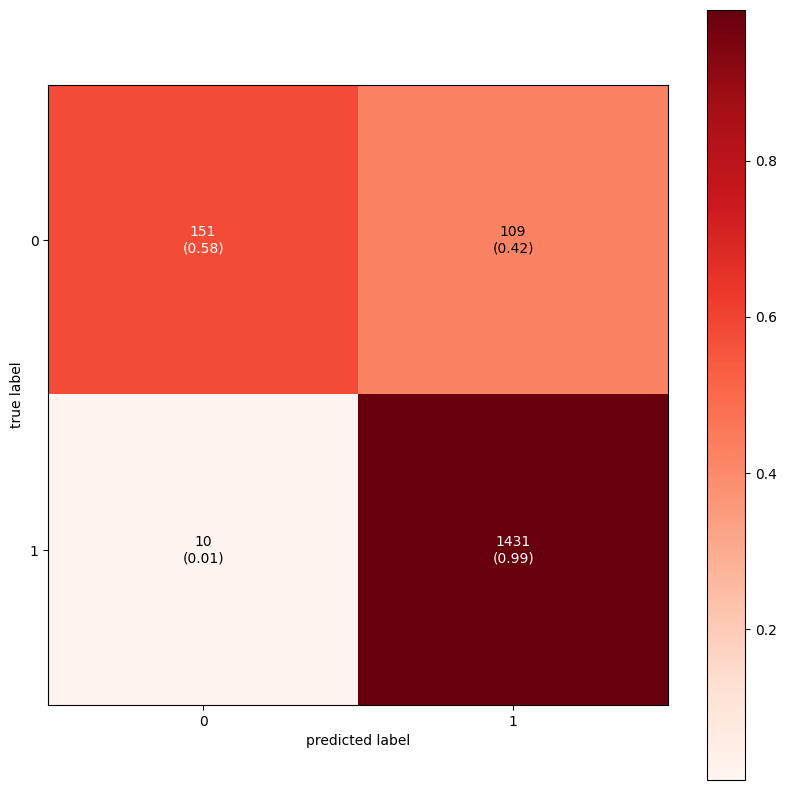

In [105]:
precision_score_LR=precision_score(y_test,y_pred_test1)
recall_score_LR=recall_score(y_test,y_pred_test1)
f1_score_LR=f1_score(y_test,y_pred_test1)

print("Precision Score :",precision_score_LR)
print("Recall Score :",recall_score_LR)
print("f1 Score :",f1_score_LR)

print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred_test1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')
plt.show()

In [106]:
fpr_lr,tpr_lr,th_lr=roc_curve(y_test,y_pred_test1)
fpr_lr,tpr_lr,th_lr

(array([0.        , 0.41923077, 1.        ]),
 array([0.        , 0.99306037, 1.        ]),
 array([inf,  1.,  0.]))

plot roc_curve

# Random Forest

In [107]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [108]:
y_pred_test2 = Rando.predict(X_test)
y_p_train=Rando.predict(X_train);
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test2))
print(" tranning Accuracy:", accuracy_score(y_train, y_p_train))

print("Classification Report:")
print(classification_report(y_test, y_pred_test2))

Testing Accuracy: 0.9288653733098178
 tranning Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.53      0.70       260
         1.0       0.92      1.00      0.96      1441

    accuracy                           0.93      1701
   macro avg       0.96      0.77      0.83      1701
weighted avg       0.93      0.93      0.92      1701



Precision Score : 0.9225352112676056
Recall Score : 1.0
f1 Score : 0.9597069597069597
[[ 139  121]
 [   0 1441]]




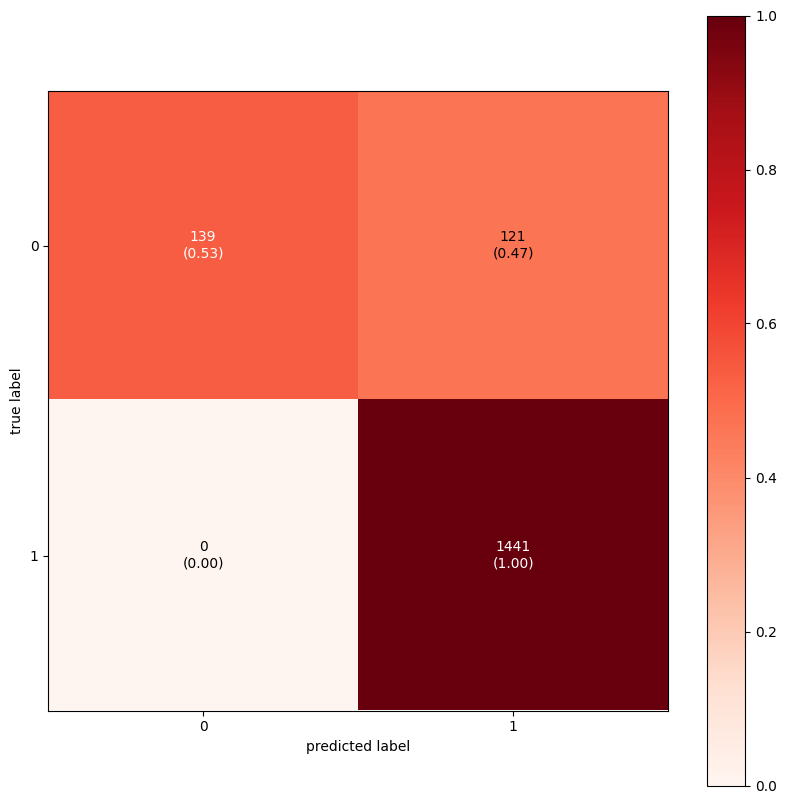

In [109]:
precision_score_Rf=precision_score(y_test,y_pred_test2)
recall_score_Rf=recall_score(y_test,y_pred_test2)
f1_score_Rf=f1_score(y_test,y_pred_test2)

print("Precision Score :", precision_score_Rf)
print("Recall Score :",recall_score_Rf)
print("f1 Score :",f1_score_Rf)

CR=confusion_matrix(y_test, y_pred_test2)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

In [110]:
fpr_rf,tpr_rf,th_rf=roc_curve(y_test,y_pred_test2)
fpr_rf,tpr_rf,th_rf

(array([0.        , 0.46538462, 1.        ]),
 array([0., 1., 1.]),
 array([inf,  1.,  0.]))

# Support vector machine

In [111]:
from sklearn.svm import SVC


svm_clf=SVC(kernel='rbf', C=2, gamma=1);
svm_clf.fit(X_train,y_train);


In [112]:
y_p_train=svm_clf.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))
y_pred_test3 = svm_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test3))
print("Classification Report:")
print(classification_report(y_test, y_pred_test3))

Tranning Accuracy: 0.9991176470588236
Test Accuracy: 0.951793062904174
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82       260
         1.0       0.95      0.99      0.97      1441

    accuracy                           0.95      1701
   macro avg       0.95      0.86      0.90      1701
weighted avg       0.95      0.95      0.95      1701



Precision Score : 0.9533022014676451
Recall Score : 0.9916724496877168
f1 Score : 0.972108843537415
[[ 190   70]
 [  12 1429]]




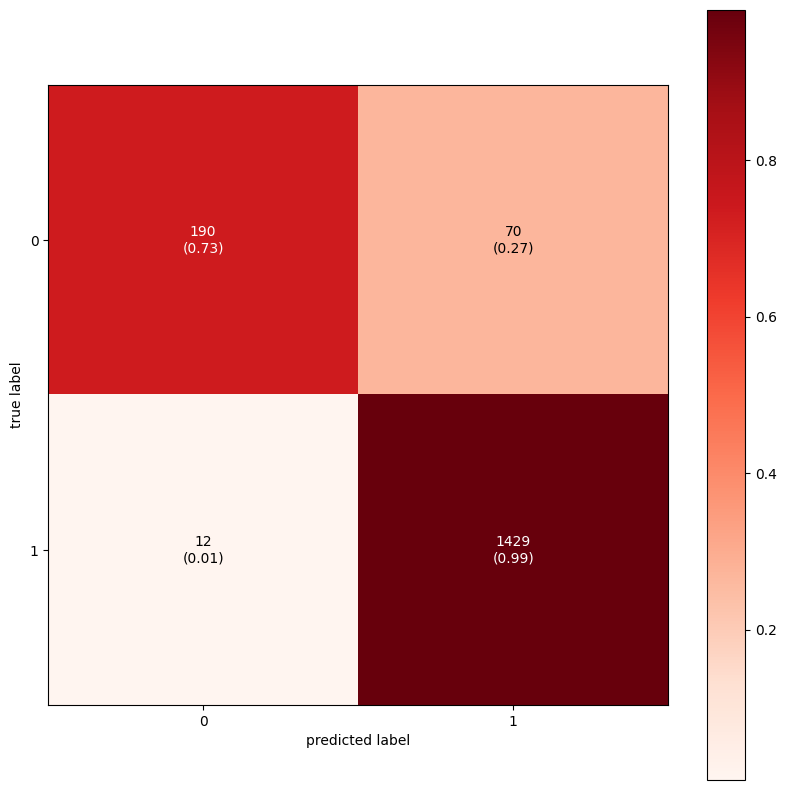

In [113]:
precision_score_sv=precision_score(y_test,y_pred_test3)
recall_score_sv=recall_score(y_test,y_pred_test3)
f1_score_sv=f1_score(y_test,y_pred_test3)

print("Precision Score :",precision_score_sv)
print("Recall Score :",recall_score_sv)
print("f1 Score :",f1_score_sv)

fpr_sv,tpr_sv,th_sv=roc_curve(y_test,y_pred_test3)
fpr_sv,tpr_sv,th_sv

#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test3)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

### best kernel ,c and gamma

In [114]:
# C_values = [0.1, 1, 10,100]
# gamma_values = [0.01, 0.1, 1]
# kernel=["linear","rbf","poly","sigmoid"]

# best_accuracy = 0
# best_params = {}

# # Iterate through all combinations of C and gamma and kernel
# for C in C_values:
#     for gamma in gamma_values:
#         for K in kernel:
#             svm_rbf = SVC(kernel=K, C=C, gamma=gamma)
#             svm_rbf.fit(X_train,y_train )
#             y_pred = svm_rbf.predict(X_test)
#             accuracy = accuracy_score(y_test, y_pred)

#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_params = {'kernel':K,'C': C, 'gamma': gamma}

# # Create model using the best hyperparameters
# best_model = SVC(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
# best_model.fit(X_train,y_train)

# y_pred_best = best_model.predict(X_test)
# test_accuracy_best = accuracy_score(y_test, y_pred_best)

# print("Best Hyperparameters:", best_params)
# print("Test Accuracy (Best Model):", test_accuracy_best)

# matrix=classification_report(y_test,y_pred_best)
# print("\n\nClassification Report\n",matrix)

# decision Tree

In [115]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_p_train=dt.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test4 = dt.predict(X_test)
print("Test  Accuracy:", accuracy_score(y_test, y_pred_test4))

print("Classification Report:")
print(classification_report(y_test, y_pred_test4))

Tranning Accuracy: 1.0
Test  Accuracy: 0.9194591416813639
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.70      0.73       260
         1.0       0.95      0.96      0.95      1441

    accuracy                           0.92      1701
   macro avg       0.85      0.83      0.84      1701
weighted avg       0.92      0.92      0.92      1701



Precision Score : 0.9471879286694102
Recall Score : 0.9583622484385843
f1 Score : 0.9527423249396344
[[ 183   77]
 [  60 1381]]




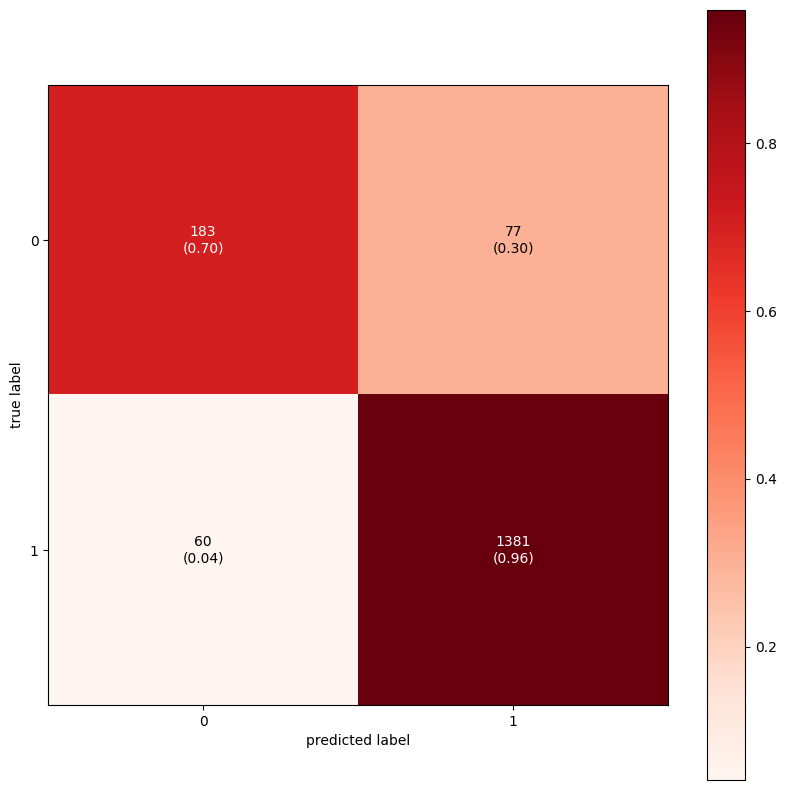

In [116]:
precision_score_dt=precision_score(y_test,y_pred_test4)
recall_score_dt=recall_score(y_test,y_pred_test4)
f1_score_dt=f1_score(y_test,y_pred_test4)

print("Precision Score :",precision_score_dt)
print("Recall Score :",recall_score_dt)
print("f1 Score :",f1_score_dt)

fpr_dt,tpr_dt,th_dt=roc_curve(y_test,y_pred_test4)
fpr_dt,tpr_dt,th_dt

#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test4)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

## AdaBoostingClassifiers

In [117]:

# svm_classifier = SVC()  # You can adjust kernel and C parameter as per your requirement
# # Initialize the AdaBoost classifier with SVM as the base estimator and SAMME algorithm
# Adab = AdaBoostClassifier(base_estimator=svm_classifier, n_estimators=5, algorithm='SAMME', random_state=1)


Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   n_estimators=5, random_state=1)

In [118]:
y_p_train=Adab.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test6 = Adab.predict(X_test)
print("testing Accuracy:", accuracy_score(y_test, y_pred_test6))

print("Classification Report:")
print(classification_report(y_test, y_pred_test6))

Tranning Accuracy: 0.9960294117647058
testing Accuracy: 0.9000587889476779
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       260
         1.0       0.93      0.95      0.94      1441

    accuracy                           0.90      1701
   macro avg       0.81      0.78      0.80      1701
weighted avg       0.90      0.90      0.90      1701



Precision Score : 0.9308474576271186
Recall Score : 0.9528105482303956
f1 Score : 0.9417009602194788
[[ 158  102]
 [  68 1373]]




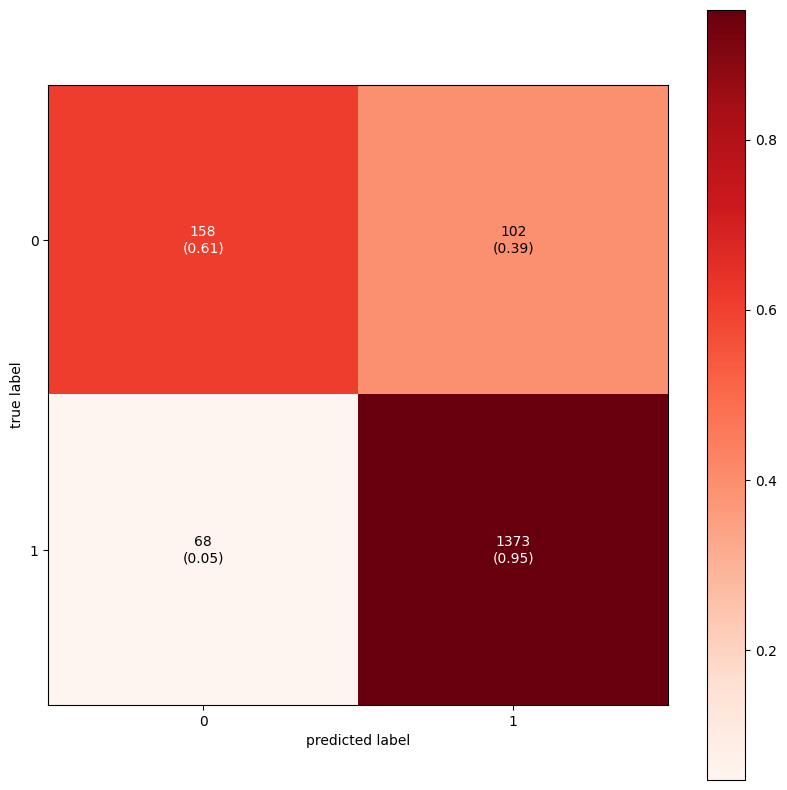

In [119]:
precision_score_Ad=precision_score(y_test,y_pred_test6)
recall_score_Ad=recall_score(y_test,y_pred_test6)
f1_score_Ad=f1_score(y_test,y_pred_test6)

print("Precision Score :",precision_score_Ad)
print("Recall Score :",recall_score_Ad)
print("f1 Score :",f1_score_Ad)

fpr_Ad,tpr_Ad,th_Ad=roc_curve(y_test,y_pred_test6)
fpr_Ad,tpr_Ad,th_Ad


#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test6)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

## GradientBoostingClassifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(max_depth=10,n_estimators=10, learning_rate=1.0,random_state=1)
GB_clf.fit(X_train, y_train)

y_p_train=GB_clf.predict(X_train);
print("Tranning Accuracy:", accuracy_score(y_train, y_p_train))

y_pred_test5 = GB_clf.predict(X_test)
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test5))
print("Classification Report:")
print(classification_report(y_test, y_pred_test5))

Tranning Accuracy: 0.9797058823529412
Testing Accuracy: 0.9153439153439153
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.63      0.69       260
         1.0       0.94      0.97      0.95      1441

    accuracy                           0.92      1701
   macro avg       0.85      0.80      0.82      1701
weighted avg       0.91      0.92      0.91      1701



Precision Score : 0.9355271994627267
Recall Score : 0.9666897987508675
f1 Score : 0.9508532423208191
[[ 164   96]
 [  48 1393]]




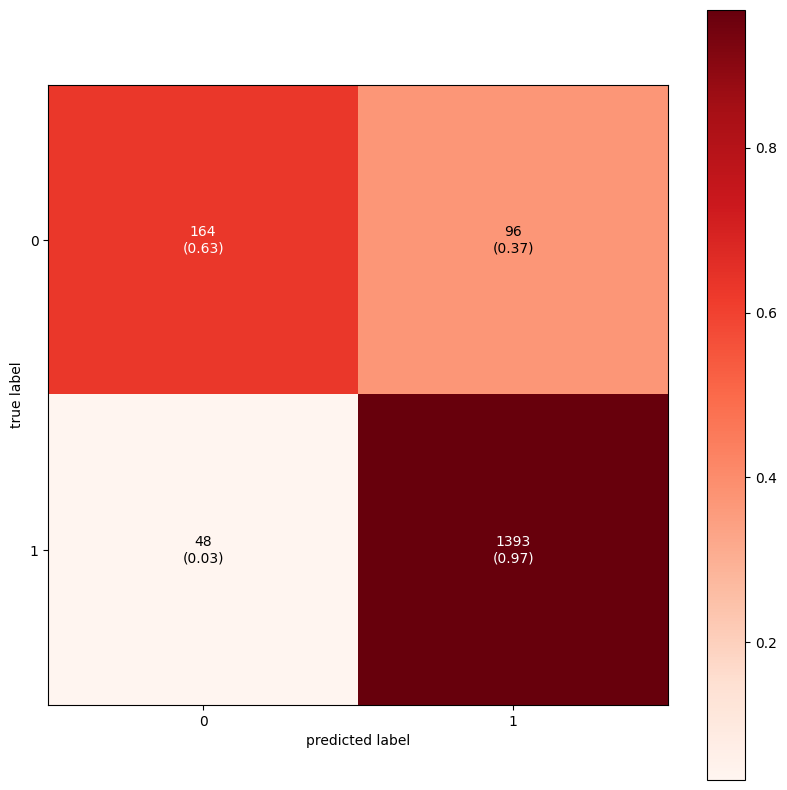

In [121]:
precision_score_gb=precision_score(y_test,y_pred_test5)
recall_score_gb=recall_score(y_test,y_pred_test5)
f1_score_gb=f1_score(y_test,y_pred_test5)

print("Precision Score :",precision_score_gb)
print("Recall Score :",recall_score_gb)
print("f1 Score :",f1_score_gb)

fpr_gb,tpr_gb,th_gb=roc_curve(y_test,y_pred_test5)
fpr_gb,tpr_gb,th_gb

#conconfusion_matrix
CR=confusion_matrix(y_test, y_pred_test5)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR, figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                cmap='Reds')

##  ROC

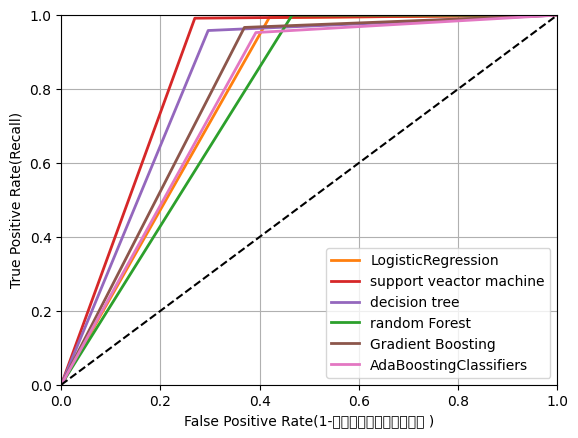

In [122]:
#logistic regression
plt.plot(fpr_lr,tpr_lr,label='LogisticRegression' ,
         linewidth=2, color='C1')

#support vactor machine
plt.plot(fpr_sv,tpr_sv,label='support veactor machine' ,
         linewidth=2, color='C3')

#Decision Tree
plt.plot(fpr_dt,tpr_dt,label='decision tree' ,
         linewidth=2, color='C4')

#random forest
plt.plot(fpr_rf,tpr_rf,label='random Forest',
         linewidth=2, color='C2')


#GradientBoosting
plt.plot(fpr_gb,tpr_gb,label='Gradient Boosting',
         linewidth=2, color='C5')
# #ada boost
plt.plot(fpr_Ad,tpr_Ad,label='AdaBoostingClassifiers' ,
         linewidth=2, color='C6')

plt.plot([0,1],[0,1],'k--')
plt.axis([0, 1, 0, 1])
plt.ylabel('True Positive Rate(Recall)')
plt.xlabel('False Positive Rate(1-ùëÜùëùùëíùëêùëñùëìùëñùëêùëñùë°ùë¶ )')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()